In [20]:
import math
from etl.users import *
from etl.events import *
from lib.constants import *
from lib.sql import *
from analysis.viz import *
from analysis.user_paths import *
from datetime import date

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
users = get_users()


  _join_mixpanel_stats (/home/jovyan/etl/users.py:82):
    2.913 seconds


  _join_first_order_facts (/home/jovyan/etl/users.py:95):
    1.392 seconds


  _cast_fields (/home/jovyan/etl/users.py:50):
    10.275 seconds


  get_users (/home/jovyan/etl/users.py:11):
    17.493 seconds




  _rename_events (/home/jovyan/etl/events.py:32):
    0.010 seconds


  coerce_types (/home/jovyan/etl/general.py:6):
    0.010 seconds


  get_events (/home/jovyan/etl/events.py:9):
    52.828 seconds

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Proxima Nova'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


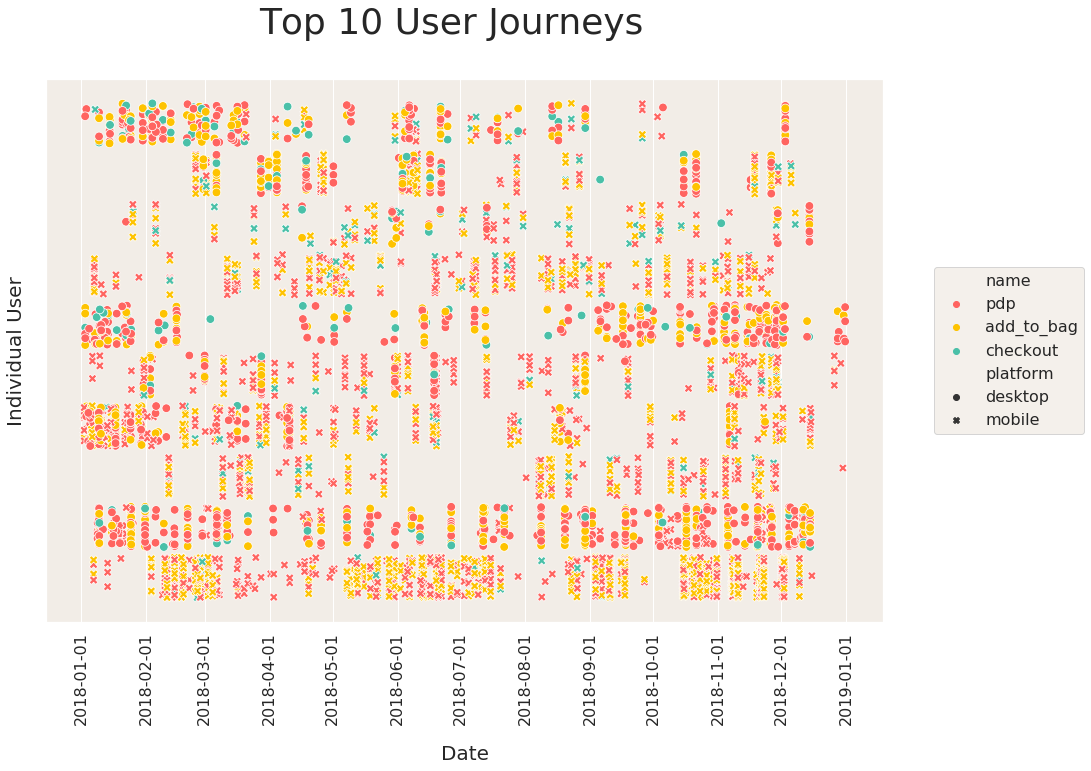

In [18]:
events = user_paths(
    users.sort_values("lifetime_orders", ascending=False).head(10),
    y_jitter=0.4,
    title="Top 10 User Journeys"
)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.


(24962, 12481)


  _rename_events (/home/jovyan/etl/events.py:32):
    0.004 seconds


  coerce_types (/home/jovyan/etl/general.py:6):
    0.004 seconds


  get_events (/home/jovyan/etl/events.py:9):
    14.339 seconds

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Proxima Nova'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


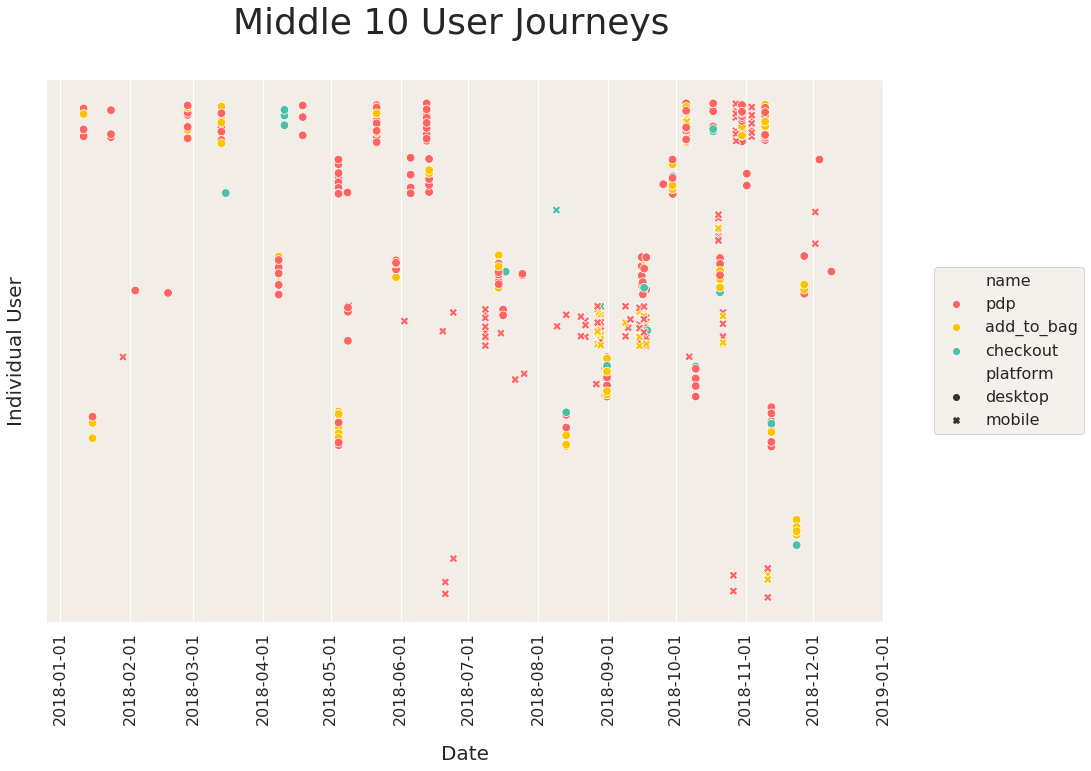

In [24]:
candidates = users[
    (users[UserColumns.LIFETIME_ORDERS] > 1) &
    (users[UserColumns.MIN_VISIT_TIME] < date(2018, 1, 1)) &
    (users[UserColumns.MAX_VISIT_TIME] > date(2019, 1, 1))
]
midpoint = math.floor(len(candidates) / 2)
display((len(candidates), midpoint))
events = user_paths(
    candidates.sort_values("lifetime_orders", ascending=False)[midpoint:midpoint+10],
    y_jitter=0.4,
    title="Middle 10 User Journeys"
)